In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_data = pd.read_csv("/workspaces/Proyecto-Tutorial-de-K-Vecinos-Mas-Cercanos/data/processed/clean_data.csv")

X = total_data.drop("tags", axis = 1)
y = total_data["tags"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

/tmp/ipykernel_3191/4014190939.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,budget,homepage,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id
402,85000000,http://www.therundown.com/,10159,en,The Rundown,24.107835,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-09-26,80916492,104.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}...",Released,cut to the chase,The Rundown,6.4,514,10159
4543,500000,NaN,45145,en,Johnny Suede,1.354816,"[{""name"": ""Vega Film"", ""id"": 8138}, {""name"": ""...","[{""iso_3166_1"": ""CH"", ""name"": ""Switzerland""}, ...",1991-08-18,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Keeping up an image can be a full time job.,Johnny Suede,4.7,13,45145
3541,6500000,NaN,925,en,Do the Right Thing,15.580335,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1989-06-30,37295445,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's the hottest day of the summer. You can do...,Do the Right Thing,7.6,292,925
2377,18000000,http://www.midnightspecialmovie.com/,245703,en,Midnight Special,32.717853,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-18,6212282,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's not like us.,Midnight Special,6.2,694,245703
4584,0,http://www.sonypictures.com/classics/dogtown/,1282,en,Dogtown and Z-Boys,3.291609,"[{""name"": ""Agi Orsi Productions"", ""id"": 794}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-01-18,0,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Dogtown and Z-Boys,7.2,52,1282


In [2]:
print(y_train.head())
print(y_test.head())

402     ["When Travis  the mouthy son of a criminal  d...
4543    ['A struggling young musician and devoted fan ...
3541    ["On the hottest day of the year on a street i...
2377    ['A father and son go on the run after the dad...
4584    ["Dogtown and Z-Boys follows the evolution of ...
Name: tags, dtype: object
1448    ['The impressionistic story of a Texas family ...
2932    ['An uproarious version of history that proves...
794     ["Combat has taken its toll on Rambo  but he's...
1029    ['Ground control has been receiving strange tr...
8       ["As Harry begins his sixth year at Hogwarts  ...
Name: tags, dtype: object


In [3]:
print(total_data["tags"])

0       ['In the 22nd century  a paraplegic Marine is ...
1       ['Captain Barbossa  long believed to be dead  ...
2       ['A cryptic message from Bond’s past sends him...
3       ["Following the death of District Attorney Har...
4       ["John Carter is a war-weary  former military ...
                              ...                        
4804    ['El Mariachi just wants to play his guitar an...
4805    ["A newlywed couple's honeymoon is upended by ...
4806    ['"Signed  Sealed  Delivered" introduces a ded...
4807    ['When ambitious New York attorney Sam is sent...
4808    ["Ever since the second grade when he first sa...
Name: tags, Length: 4809, dtype: object


In [4]:
print(X_train.columns)

Index(['budget', 'homepage', 'id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'movie_id'],
      dtype='object')


In [5]:
print(total_data["tags"].isnull().sum())

0


In [6]:
# Seleccionar columnas numéricas
numeric_columns = total_data.select_dtypes(include=['int64', 'float64'])

# Imprimir el nombre de las columnas numéricas
print("Columnas numéricas:")
print(numeric_columns.columns)

Columnas numéricas:
Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'movie_id'],
      dtype='object')


Estandarizar los datos ayuda a que todas las características contribuyan de manera equitativa a la distancia, lo que puede mejorar el rendimiento del algoritmo KNN. La elección entre normalización y estandarización Min-Max dependerá del comportamiento de las variables y de cómo afectan al rendimiento del modelo. Si tenemos características con diferentes escalas y rango, Min-Max es la mejor alternativa. Si por el contrario tienen la misma escala o similar, la normalización es la más apropiada.

A continuación visualizaremos la relación entre las variables del dataset

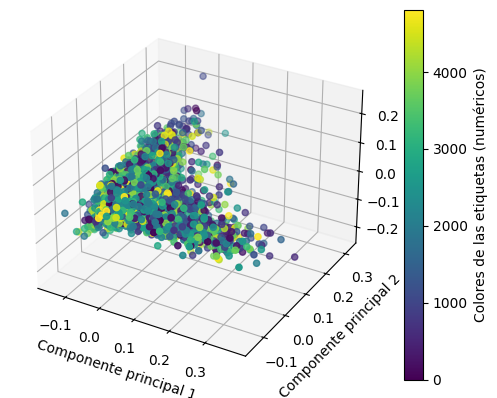

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import numpy as np

# Suprime las advertencias relacionadas con la búsqueda de la fuente
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# 1. Vectorización TF-IDF del texto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data['tags'])

# 2. Escalado de las columnas numéricas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(total_data[['popularity', 'revenue', 'runtime']])

# 3. Reducción de dimensionalidad de todas las características (texto y numéricas) a 3D usando PCA
pca = PCA(n_components=3)
combined_features = pca.fit_transform(tfidf_matrix.toarray())
combined_features = np.concatenate((combined_features, numeric_data_scaled), axis=1)

# 4. Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(total_data['tags'])

# 5. Graficar los puntos en 3D con colores según las etiquetas de 'tags'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Pintar los puntos en el gráfico con colores de las etiquetas de 'tags'
scatter = ax.scatter(combined_features[:, 0], combined_features[:, 1], combined_features[:, 2], c=numeric_labels, marker='o')

# Etiquetar los ejes
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')

# Añadir una barra de color
colorbar = plt.colorbar(scatter)
colorbar.set_label('Colores de las etiquetas (numéricos)')

plt.show()

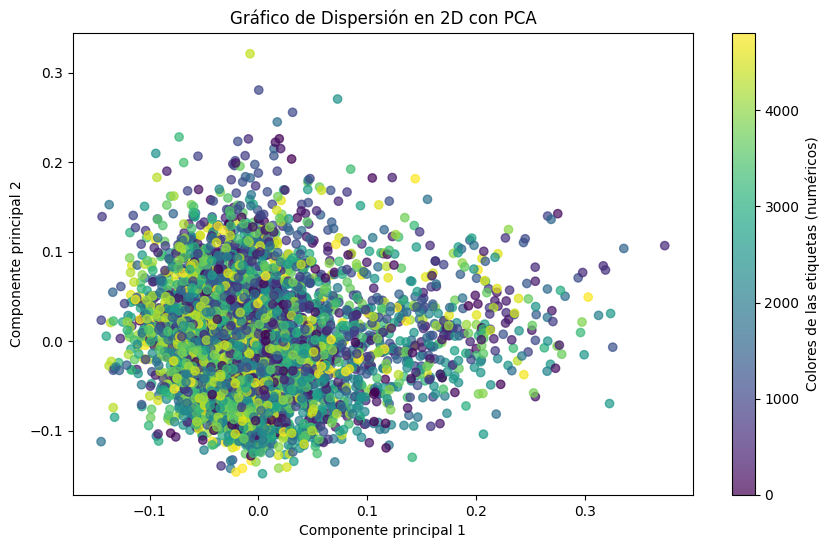

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Vectorización TF-IDF del texto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data['tags'])

# 2. Escalado de las columnas numéricas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(total_data[['popularity', 'revenue', 'runtime']])

# 3. Reducción de dimensionalidad de todas las características (texto y numéricas) a 2D usando PCA
pca = PCA(n_components=2)
combined_features_2d = pca.fit_transform(tfidf_matrix.toarray())
combined_features_2d = np.concatenate((combined_features_2d, numeric_data_scaled), axis=1)

# 4. Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(total_data['tags'])

# 5. Graficar el gráfico de dispersión en 2D con colores según las etiquetas de 'tags'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(combined_features_2d[:, 0], combined_features_2d[:, 1], c=numeric_labels, cmap='viridis', marker='o', alpha=0.7)

# Etiquetar los ejes
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')

# Añadir una barra de color
colorbar = plt.colorbar(scatter)
colorbar.set_label('Colores de las etiquetas (numéricos)')

plt.title('Gráfico de Dispersión en 2D con PCA')

plt.show()

Para más información, podríamos calcular un diagrama de puntos para la relación entre las variables dos a dos (esto tendría que hacerse en el EDA):

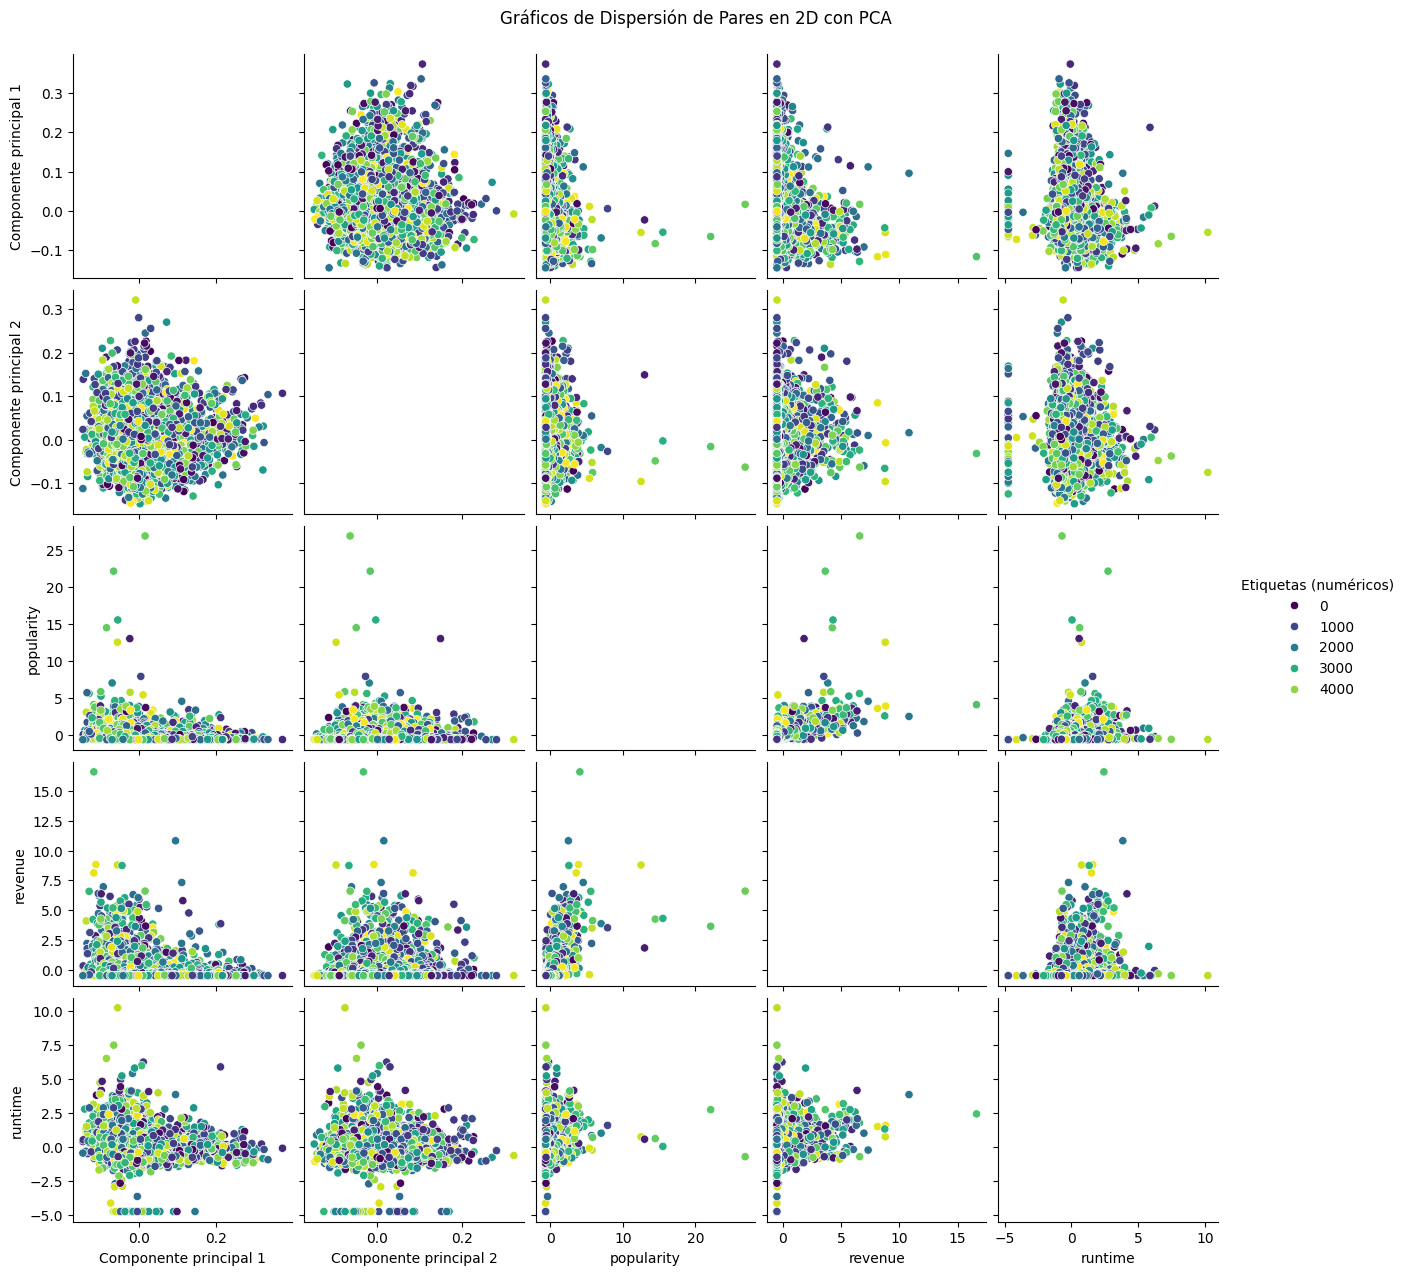

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



# 1. Vectorización TF-IDF del texto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data['tags'])

# 2. Escalado de las columnas numéricas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(total_data[['popularity', 'revenue', 'runtime']])

# 3. Reducción de dimensionalidad de todas las características (texto y numéricas) a 2D usando PCA
pca = PCA(n_components=2)
combined_features_2d = pca.fit_transform(tfidf_matrix.toarray())
combined_features_2d = np.concatenate((combined_features_2d, numeric_data_scaled), axis=1)

# 4. Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(total_data['tags'])

# 5. Crear un DataFrame con los datos reducidos
column_names = ['Componente principal 1', 'Componente principal 2', 'popularity', 'revenue', 'runtime']
data_2d = pd.DataFrame(combined_features_2d, columns=column_names)
data_2d['Etiquetas (numéricos)'] = numeric_labels

# 6. Graficar un par de gráficos de dispersión utilizando seaborn
sns.pairplot(data_2d, hue='Etiquetas (numéricos)', palette='viridis', markers='o', diag_kind='kde')

plt.suptitle('Gráficos de Dispersión de Pares en 2D con PCA', y=1.02)
plt.show()

Utilizando el algoritmo KNN en este código, pero en lugar de utilizar el KNeighborsClassifier de scikit-learn, estás usando NearestNeighbors para la búsqueda de vecinos más cercanos basada en la similitud de coseno de la matriz TF-IDF. Este enfoque es comúnmente utilizado para recuperación de información y tareas de búsqueda de documentos similares en texto.

In [15]:

# KNN modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data["tags"])

model = NearestNeighbors(n_neighbors = 6, algorithm = "brute", metric = "cosine")
model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [24]:
def get_movie_recommendations(movie_title):
    movie_index = total_data[total_data["title"] == movie_title].index[0]
    distances, indices = model.kneighbors(tfidf_matrix[movie_index])
    similar_movies = [(total_data["title"][i], distances[0][j]) for j, i in enumerate(indices[0])]
    return similar_movies[1:]

input_movie = "Rambo III"
recommendations = get_movie_recommendations(input_movie)
print("Film recommendations '{}'".format(input_movie))
for movie, distance in recommendations:
    print("- Film: {}".format(movie))

Film recommendations 'Rambo III'
- Film: Monster's Ball
- Film: City of Life and Death
- Film: The Last Emperor
- Film: The Mummy: Tomb of the Dragon Emperor


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Inicialización y entrenamiento del modelo KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Predicciones en datos de prueba
y_pred = model.predict(X_test)

# Evaluación del rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0
